In [1]:
import pandas as pd
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Q 3

Coaches would love to know if there are indicators that can help determine when the flow of play is about to change from favoring one player to the other.

- Using the data provided for at least one match, develop a model that predicts these swings in the match. What factors seem most related (if any)?
- Given the differential in past match “momentum” swings how do you advise a player going into a new match against a different player?

Considering that simply using performance to describe momentum is not comprehensive enough, we considered several criteria based on the performance obtained from the Q1 model according to the following feature:

- **last_round_rally_cnt**:We consider this data from the perspective of physical exertion, mental endurance and concentration. The number of hits played by a player in the previous round will affect the player’s physical strength to a certain extent. At the same time, if the number of hits is larger, it will affect mental endurance and concentration. Degree will also have a certain impact

- **double_fault**:We believe that double faults will greatly affect the mentality of the players, so we take them into consideration

- **break_pt_missed**:We believe that losing points at match points will greatly affect a player's performance, so we take this into consideration

In [2]:
path = 'E:\MEM-Problem-C\data\data_processed_Q3.csv'
dataset = pd.read_csv(path)
dataset = dataset.drop(['match_id'], axis=1) # dataset drop了match_id这一列
data = pd.read_csv(path)
# dataset = dataset[300:] # dataset目前剔除了第一把比赛的数据
data # data目前是所有数据
print(dataset)

      point_diff  distance_run  win_streak  unf_err  serve  ace  elapsed_time  \
0              0         6.000           0        1      1    0             0   
1             -1         5.253           0        0      1    0            38   
2              0        13.800           1        1      1    0            23   
3             -1        51.108           0        0      1    0            30   
4              0         0.649           1        0      1    1            50   
...          ...           ...         ...      ...    ...  ...           ...   
7279          -1        38.620           0        0      1    0            27   
7280           0        17.533           1        0      1    0            45   
7281           1        10.882           2        0      1    0            37   
7282           0         7.893           0        0      1    0            32   
7283           1        17.811           1        0      1    0            35   

      net_pt_won  last_roun

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # 最大最小操作，映射到[0, 1]区间
columns = dataset.columns[:-1] # 取出dataset的除了label的所有列名称
print(columns)
scaler.fit(dataset[columns].values) # 学习除了label那一列，每列的最大最小值
dataset[columns] = scaler.transform(dataset[columns].values) # 对除了label的每列，根据之前计算的最大最小值，进行归一化操作
dataset.to_excel('tra_data_Q3.xlsx',index=False) # 导出归一化的数据excel表格

Index(['point_diff', 'distance_run', 'win_streak', 'unf_err', 'serve', 'ace',
       'elapsed_time', 'net_pt_won', 'last_round_rally_cnt', 'double_fault',
       'break_pt_missed', 'distance_lag1', 'distance_lag2', 'rally_cnt_lag1',
       'rally_cnt_lag2'],
      dtype='object')


In [4]:
import warnings
warnings.filterwarnings("ignore")
# 定义了evaluate函数，该函数用于评估模型在5重交叉验证下的性能，并返回5个评估指标的平均值
def evaluate(model):
    auc = round(cross_val_score(model,dataset[columns].values,dataset['label'].values, cv=5,scoring='roc_auc').mean(),2)
    acc = round(cross_val_score(model,dataset[columns].values,dataset['label'].values, cv=5,scoring='accuracy').mean(),2)
    recall = round(cross_val_score(model,dataset[columns].values,dataset['label'].values, cv=5,scoring='recall').mean(),2)
    precision = round(cross_val_score(model,dataset[columns].values,dataset['label'].values, cv=5,scoring='precision').mean(),2)
    f1 = round(cross_val_score(model,dataset[columns].values,dataset['label'].values, cv=5,scoring='f1').mean(),2)
    return acc,recall,precision,f1,auc

model = LGBMClassifier(random_state=30,force_col_wise=True)
print(f'LGBMClassifier acc,recall,precision,f1,auc :{evaluate(model)}')
model = XGBClassifier(random_state=50)
print(f'XGBClassifier acc,recall,precision,f1,auc :{evaluate(model)}')
model = SVC(random_state=50)
print(f'SVC acc,recall,precision,f1,auc :{evaluate(model)}')
model = MLPClassifier(random_state=5)
print(f'MLPClassifier acc,recall,precision,f1,auc :{evaluate(model)}')
model = LogisticRegression(random_state=50)
print(f'LogisticRegression acc,recall,precision,f1,auc :{evaluate(model)}')
model = DecisionTreeClassifier(random_state=50)
print(f'DecisionTreeClassifier acc,recall,precision,f1,auc :{evaluate(model)}')
model = RandomForestClassifier(random_state=50)
print(f'RandomForestClassifier acc,recall,precision,f1,auc :{evaluate(model)}')
model = GaussianNB()
print(f'GaussianNB acc,recall,precision,f1,auc :{evaluate(model)}')

[LightGBM] [Info] Number of positive: 2975, number of negative: 2852
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points in the train set: 5827, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510554 -> initscore=0.042224
[LightGBM] [Info] Start training from score 0.042224
[LightGBM] [Info] Number of positive: 2974, number of negative: 2853
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 5827, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510383 -> initscore=0.041537
[LightGBM] [Info] Start training from score 0.041537
[LightGBM] [Info] Number of positive: 2974, number of negative: 2853
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 5827, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510383 -> initscore=0.041537
[LightGBM] [Info] Start training from score 0.041537
[LightGBM] [Info] N

[LightGBM] [Info] Number of positive: 2991, number of negative: 2836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 5827, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513300 -> initscore=0.053213
[LightGBM] [Info] Start training from score 0.053213


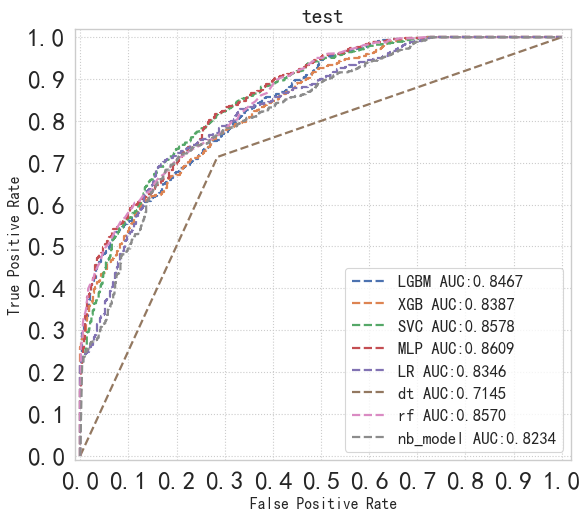

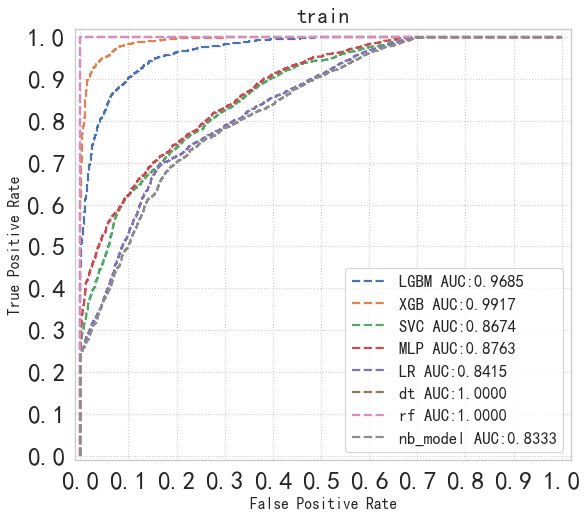

In [74]:
import numpy as np
from  sklearn import metrics


def draw(model_list,name_list,types='train'):
    plt.figure(figsize=(8, 7), dpi=80, facecolor='w')    # dpi:每英寸长度的像素点数；facecolor 背景颜色
    plt.xlim((-0.01, 1.02))  # x,y 轴刻度的范围
    plt.ylim((-0.01, 1.02))
    plt.xticks(np.arange(0, 1.1, 0.1))  #绘制刻度
    plt.yticks(np.arange(0, 1.1, 0.1))

    if types == 'test':
        for model,name in zip(model_list,name_list):
            ytest_prob = model.predict_proba(xvalid)[:,1]
            fpr, tpr, _ = metrics.roc_curve(yvalid, ytest_prob)
            auc = metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr, '--', lw=2, label=f'{name} AUC:%.4f' % auc)  # 绘制AUC 曲线
    else:
        for model,name in zip(model_list,name_list):
            ytest_prob = model.predict_proba(xtrain)[:,1]
            fpr, tpr, _ = metrics.roc_curve(ytrain, ytest_prob)
            auc = metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr, '--', lw=2, label=f'{name} AUC:%.4f' % auc)  # 绘制AUC 曲线
    plt.legend(loc='lower right',fontsize=15)    # 设置显示标签的位置
    plt.xlabel('False Positive Rate', fontsize=14)   #绘制x,y 坐标轴对应的标签
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.tick_params(labelsize=23)

    plt.grid(True, ls=':')  # 绘制网格作为底板;b是否显示网格线；ls表示line style
    plt.savefig(f'results\\roc_auc({types}).png',dpi=500)
    plt.title(types)
    plt.show()

# 划分训练集和测试集，训练集(5587row)：测试集(1397)=8：2
xtrain, xvalid, ytrain, yvalid = train_test_split(dataset[columns].values,dataset['label'].values,random_state=620,test_size=0.2)

model1 = LGBMClassifier(random_state=30)
model2 = XGBClassifier(random_state=50)
model3 = SVC(probability=True,random_state=50)
model4 = MLPClassifier(random_state=5)
model5 = LogisticRegression(random_state=50)
dt_model = DecisionTreeClassifier(random_state=50)
rf_model = RandomForestClassifier(random_state=40)
nb_model = GaussianNB()


# 随机森林

model1.fit(xtrain,ytrain)
model2.fit(xtrain,ytrain)
model3.fit(xtrain,ytrain)
model4.fit(xtrain,ytrain)
model5.fit(xtrain,ytrain)
dt_model.fit(xtrain, ytrain)
rf_model.fit(xtrain, ytrain)
nb_model.fit(xtrain, ytrain)

draw([model1,model2,model3,model4,model5, dt_model, rf_model, nb_model],['LGBM','XGB','SVC','MLP','LR', 'dt', 'rf', 'nb_model'],'test')
draw([model1,model2,model3,model4,model5, dt_model, rf_model, nb_model],['LGBM','XGB','SVC','MLP','LR', 'dt', 'rf', 'nb_model'],'train')

In [1]:
acc_list = []
for i in range(31):
    index = data[data.match_id == i].index  # 取出第一场比赛的索引列表
    test = data.iloc[index]  # 从预处理数据中取出第一场比赛，用来验证模型
    pred_01 = model.predict(test[columns].values)
    pred_01 = pd.DataFrame({'label': pred_01})
    test.reset_index(drop=True, inplace=True)
    label = pd.DataFrame({'score':test['label']})
    err_sum = sum(abs(pred_01['label'] - label['score']))
    acc_rate = (len(pred_01) - err_sum) /len(pred_01)
    acc_list.append(acc_rate)
x_values = list(range(31))  # 取决于你的数据范围

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(x_values, acc_list, color='blue', alpha=0.7)

# 添加标题和标签
plt.title('Accuracy Rate for Each Match')
plt.xlabel('Match ID')
plt.ylabel('Accuracy Rate')

# 显示柱状图
plt.show()

NameError: name 'data' is not defined

In [6]:
index = data[data.match_id==30].index # 取出第一场比赛的索引列表
test = data.iloc[index] # 从预处理数据中取出第一场比赛，用来验证模型
print(index)
train = data.drop(index,axis=0) # 从原数据中剔除第一场比赛的三百条记录作为训练数据集
model = MLPClassifier(random_state=30) # 实例化神经网络模型
model.fit(train[columns].values,train['label'].values) # 训练模型
pred = model.predict_proba(test[columns].values) # 得到每一行输出在0和1的概率，第一列表示0的概率，第二列表示1的概率
pred = pd.DataFrame({'score':pred[:,1]}) # 0的概率表示输球概率，1的概率表示赢球概率，因此只取处pred列表的第二列
pred_01 = model.predict(test[columns].values)
pred_01 = pd.DataFrame({'label':pred_01})
test.reset_index(drop=True, inplace=True)

Index([6950, 6951, 6952, 6953, 6954, 6955, 6956, 6957, 6958, 6959,
       ...
       7274, 7275, 7276, 7277, 7278, 7279, 7280, 7281, 7282, 7283],
      dtype='int64', length=334)


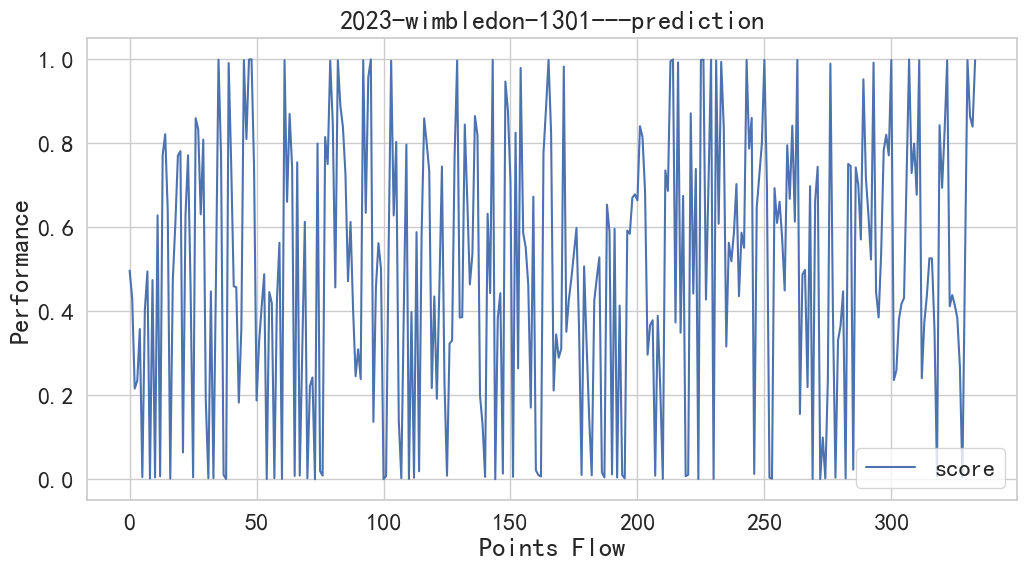

In [7]:
import seaborn as sns
sns.set(font= "simhei",style="whitegrid",font_scale=1.6)
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False # 解决坐标轴的负号显示问题
import matplotlib.pyplot as plt


pred.plot(kind = "line",figsize = (12,6)) #颜色,matplotlib
plt.xticks(rotation=0)
plt.xlabel("Points Flow")
plt.ylabel("Performance")
plt.title('2023-wimbledon-1301---prediction')
#plt.savefig('results\\Q3-match_flow_prediction.png',dpi=500)
plt.show()

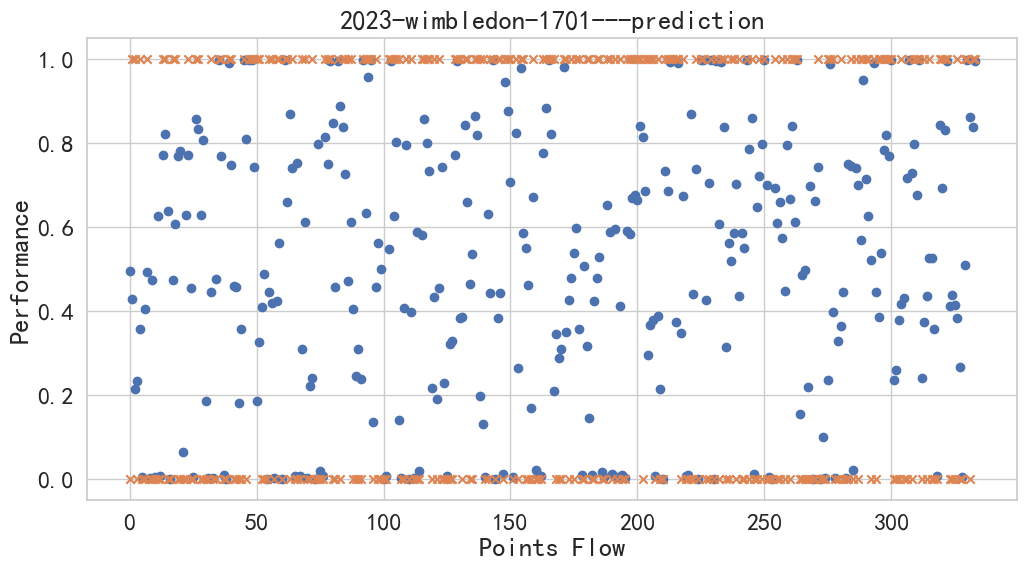

In [8]:
label = pd.DataFrame({'score':test['label']})
plt.figure(figsize=(12, 6))
plt.scatter(range(len(pred)), pred, label='Prediction', marker='o')
plt.scatter(range(len(pred)), label, label='Actual', marker='x')
plt.xticks(rotation=0)
plt.xlabel("Points Flow")
plt.ylabel("Performance")
plt.title('2023-wimbledon-1701---prediction')
plt.show()

In [72]:
pred_01['label'] - label['score']

0      0
1     -1
2     -1
3      0
4     -1
      ..
329   -1
330    0
331    1
332    0
333    0
Length: 334, dtype: int64

In [9]:
# 结果分析
err_sum = sum(abs(pred_01['label'] - label['score']))
acc_rate = (len(pred_01) - err_sum) /len(pred_01)
print('round_num:{}\nacc_num:{}\nacc_rate:{:.2%}'.format(len(pred_01), len(pred_01) - err_sum, acc_rate))

round_num:334
acc_num:242
acc_rate:72.46%


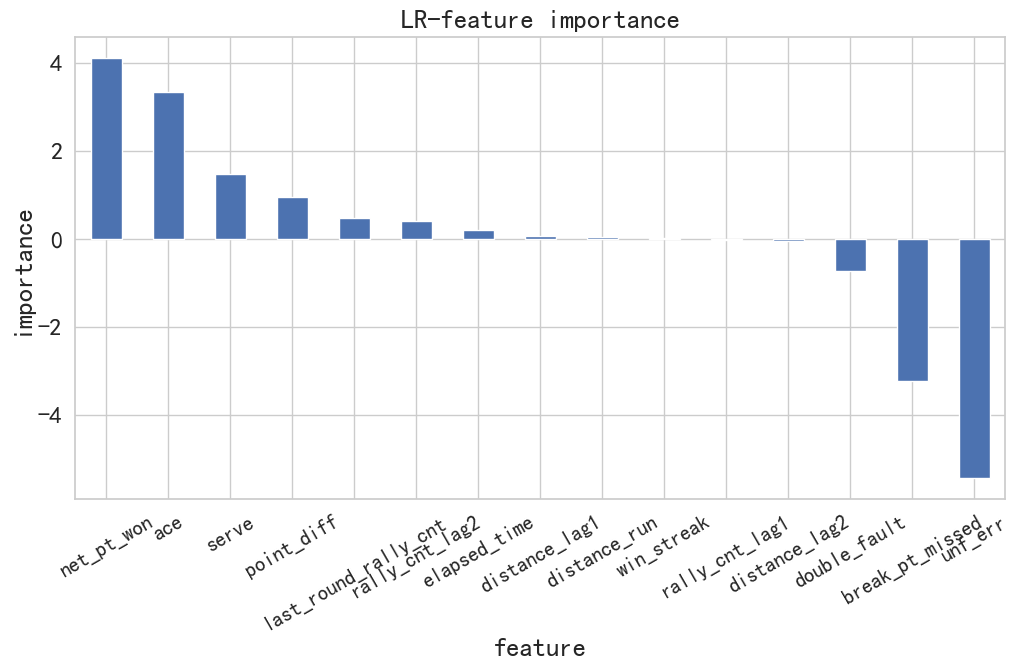

In [10]:
import seaborn as sns
sns.set(font= "simhei",style="whitegrid",font_scale=1.6)
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False # 解决坐标轴的负号显示问题
import matplotlib.pyplot as plt
import plotly.express as px

#输出重要性得分
f = pd.DataFrame({'col':list(columns),'score':model5.coef_[0]}).sort_values(by='score',ascending=False)
f.index = f['col']
f["score"].plot(kind = "bar",figsize = (12,6)) #颜色,matplotlib
plt.xlabel("feature")
plt.ylabel("importance")
plt.xticks(rotation = 30,fontsize = 15)
plt.title('LR-feature importance')
plt.savefig('results\\Q3-LR-feature importance.png',dpi=500,bbox_inches='tight')
plt.show()

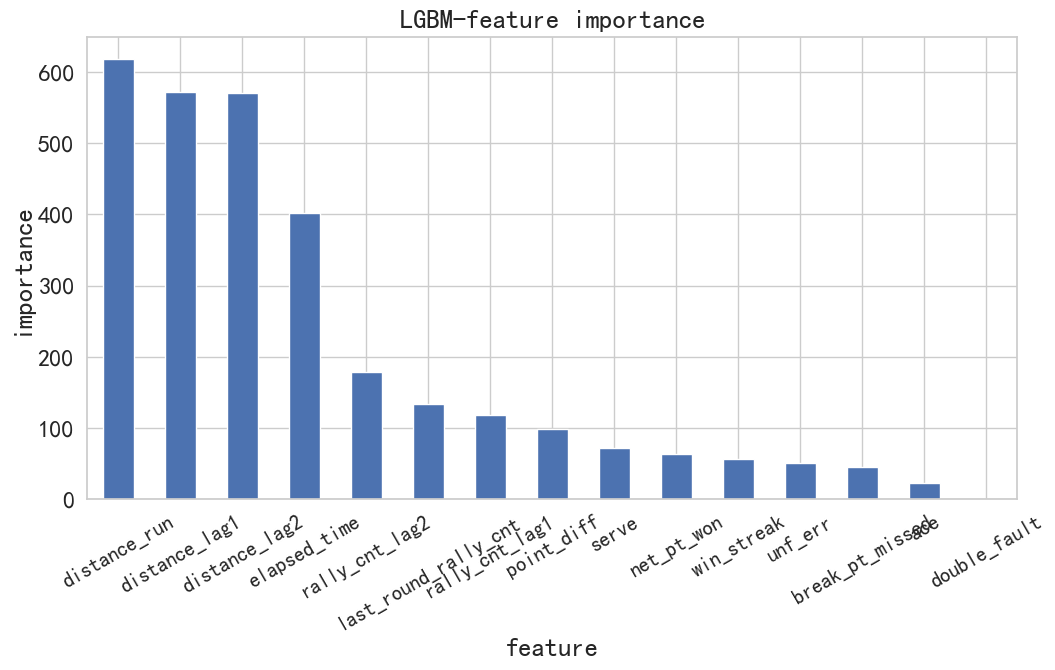

In [11]:
import seaborn as sns
sns.set(font= "simhei",style="whitegrid",font_scale=1.6)
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False # 解决坐标轴的负号显示问题
import matplotlib.pyplot as plt
import plotly.express as px

#输出重要性得分
f = pd.DataFrame({'col':list(columns),'score':model1.feature_importances_}).sort_values(by='score',ascending=False)
f.index = f['col']
f["score"].plot(kind = "bar",figsize = (12,6)) #颜色,matplotlib
plt.xlabel("feature")
plt.ylabel("importance")
plt.xticks(rotation = 30,fontsize = 15)
plt.title('LGBM-feature importance')
plt.savefig('results\\Q3-LGBM-feature importance.png',dpi=500,bbox_inches='tight')
plt.show()

spearmanr相关系数：0.563120150891587
P值：2.457607310913537e-29


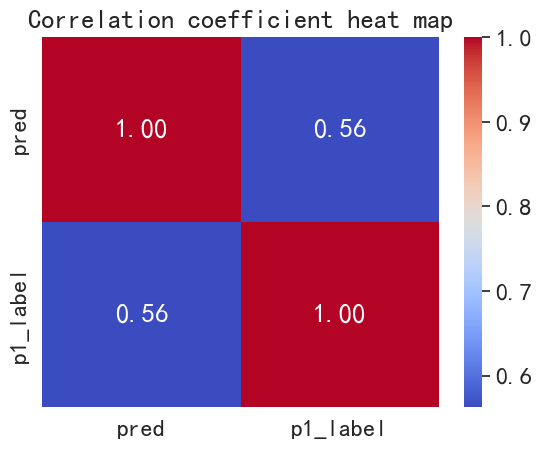

In [82]:
from scipy.stats import pearsonr, spearmanr

data1 = pd.read_csv('pred_Q3.csv')
correlation_coefficient, p_value = spearmanr(data1['pred'], data1['p1_label'])
correlation_matrix = data1.corr(method='spearman')
# 打印结果
print(f"spearmanr相关系数：{correlation_coefficient}")
print(f"P值：{p_value}")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation coefficient heat map')
plt.savefig('results\\Q3-Correlation coefficient heat map.png',dpi=500,bbox_inches='tight')
plt.show()

# 灵敏度分析

[LightGBM] [Info] Number of positive: 2991, number of negative: 2836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 5827, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513300 -> initscore=0.053213
[LightGBM] [Info] Start training from score 0.053213
Index([6950, 6951, 6952, 6953, 6954, 6955, 6956, 6957, 6958, 6959,
       ...
       7274, 7275, 7276, 7277, 7278, 7279, 7280, 7281, 7282, 7283],
      dtype='int64', length=334)
[LightGBM] [Info] Number of positive: 3550, number of negative: 3400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

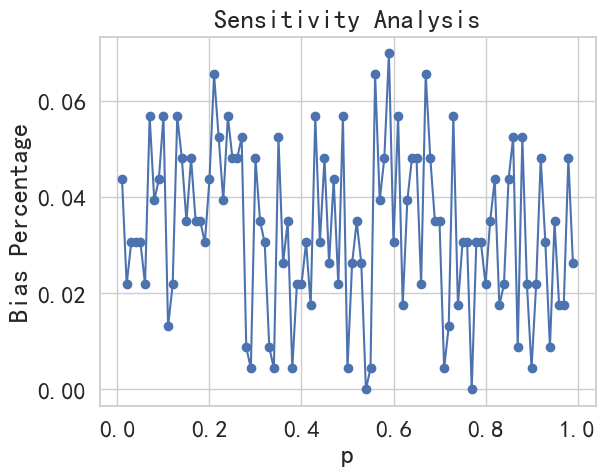

In [71]:
# 创建 DataFrame
seed_value = 4
np.random.seed(seed_value)


# 定义替换函数
def replace_with_random(row, column_name, p):
    x = row[column_name]
    lower_bound = (1 - p) * x
    upper_bound = (1 + p) * x
    return np.random.uniform(lower_bound, upper_bound)
acc = []
p_values = np.arange(0, 1.01, 0.01)
for p in p_values:
    df = pd.DataFrame(data)
    df = df.drop(['match_id'], axis=1)
    column_name = 'distance_run'
    df[column_name] = df.apply(replace_with_random, axis=1, column_name=column_name, p=p)
    scaler = MinMaxScaler() # 最大最小操作，映射到[0, 1]区间
    columns = df.columns[:-1] # 取出dataset的除了label的所有列名称
    scaler.fit(df[columns].values) # 学习除了label那一列，每列的最大最小值
    df[columns] = scaler.transform(df[columns].values) # 对除了label的每列，根据之前计算的最大最小值，进行归一化操作
    xtrain, xvalid, ytrain, yvalid = train_test_split(df[columns].values,df['label'].values,random_state=620,test_size=0.2)
    model1 = LGBMClassifier(random_state=30)
    model1.fit(xtrain,ytrain)
    index = data[data.match_id==30].index # 取出第一场比赛的索引列表
    test = df.iloc[index] # 从预处理数据中取出第一场比赛，用来验证模型
    print(index)
    train = df.drop(index,axis=0) # 从原数据中剔除第一场比赛的三百条记录作为训练数据集
    model = LGBMClassifier(random_state=30) # 实例化神经网络模型
    model.fit(train[columns].values,train['label'].values) # 训练模型
    pred = model.predict_proba(test[columns].values) # 得到每一行输出在0和1的概率，第一列表示0的概率，第二列表示1的概率
    pred = pd.DataFrame({'score':pred[:,1]}) # 0的概率表示输球概率，1的概率表示赢球概率，因此只取处pred列表的第二列
    pred_01 = model.predict(test[columns].values)
    pred_01 = pd.DataFrame({'label':pred_01})
    test.reset_index(drop=True, inplace=True)
    err_sum = sum(abs(pred_01['label'] - label['score']))
    acc_rate = (len(pred_01) - err_sum) /len(pred_01)
    acc.append(acc_rate)
print(acc)
bias_list = []
for i in range(1, 100):
    bias = abs(acc[i] - acc[0]) / acc[0]
    bias_list.append(bias)
p_values = np.arange(0.01, 1.0, 0.01)

plt.plot(p_values, bias_list, marker='o')
plt.xlabel('p')
plt.ylabel('Bias Percentage')

plt.title('Sensitivity Analysis')
plt.grid(True)
plt.show()
# # 指定列和偏移百分比
# column_name = 'distance_run'
# p = 0.3
# # 对整列进行替换
# df[column_name] = df.apply(replace_with_random, axis=1, column_name=column_name, p=p)
#
# # 最大最小值操作
# scaler = MinMaxScaler() # 最大最小操作，映射到[0, 1]区间
# columns = df.columns[:-1] # 取出dataset的除了label的所有列名称
# scaler.fit(df[columns].values) # 学习除了label那一列，每列的最大最小值
# df[columns] = scaler.transform(df[columns].values) # 对除了label的每列，根据之前计算的最大最小值，进行归一化操作
#
# xtrain, xvalid, ytrain, yvalid = train_test_split(df[columns].values,df['label'].values,random_state=620,test_size=0.2)
#
# model1 = LGBMClassifier(random_state=30)
# model1.fit(xtrain,ytrain)
#
# f = pd.DataFrame({'col':list(columns),'score':model1.feature_importances_}).sort_values(by='score',ascending=False)
# f.index = f['col']
# f["score"].plot(kind = "bar",figsize = (12,6)) #颜色,matplotlib
# plt.xlabel("feature")
# plt.ylabel("importance")
# plt.xticks(rotation = 30,fontsize = 15)
# plt.title('LGBM-feature importance')
# plt.show()


In [60]:
index = data[data.match_id==30].index # 取出第一场比赛的索引列表
test = df.iloc[index] # 从预处理数据中取出第一场比赛，用来验证模型
print(index)
train = df.drop(index,axis=0) # 从原数据中剔除第一场比赛的三百条记录作为训练数据集
model = LGBMClassifier(random_state=30) # 实例化神经网络模型
model.fit(train[columns].values,train['label'].values) # 训练模型
pred = model.predict_proba(test[columns].values) # 得到每一行输出在0和1的概率，第一列表示0的概率，第二列表示1的概率
pred = pd.DataFrame({'score':pred[:,1]}) # 0的概率表示输球概率，1的概率表示赢球概率，因此只取处pred列表的第二列
pred_01 = model.predict(test[columns].values)
pred_01 = pd.DataFrame({'label':pred_01})
test.reset_index(drop=True, inplace=True)

Index([6950, 6951, 6952, 6953, 6954, 6955, 6956, 6957, 6958, 6959,
       ...
       7274, 7275, 7276, 7277, 7278, 7279, 7280, 7281, 7282, 7283],
      dtype='int64', length=334)
[LightGBM] [Info] Number of positive: 3550, number of negative: 3400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 6950, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510791 -> initscore=0.043172
[LightGBM] [Info] Start training from score 0.043172


In [61]:
# 结果分析
err_sum = sum(abs(pred_01['label'] - label['score']))
acc_rate = (len(pred_01) - err_sum) /len(pred_01)
print('round_num:{}\nacc_num:{}\nacc_rate:{:.2%}'.format(len(pred_01), len(pred_01) - err_sum, acc_rate))

round_num:334
acc_num:236
acc_rate:70.66%


| distance_run         | p<0.85 |
| -------------------- |--------|
| elapsed_time         | p<0.7  |
| last_round_rally_cnt | p<0.1  |